# Data Preparation

In [1]:
# Import packages + load dataframe
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Load CSV file into DataFrame
df = pd.read_csv('data.csv')

/var/folders/4z/n7sr27qx5h18n91g81tmnsdh0000gn/T/ipykernel_54845/1148624869.py:7: DtypeWarning: Columns (690,691,692,703,706,708,709,710,711,712,713,714,715,716,717,718,719,720,721,1172,1174,1185,1214) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


In [ ]:
# Analyze dataframe
print(list(df.columns))

['artificial_id', 'Non_SOGI_School', 'Location', 'QN1', 'QN2', 'QN3', 'QN4a', 'QN4b', 'QN4c', 'QN4d', 'QN4e', 'QN5a', 'QN5b', 'QN5c', 'QN5d', 'QN5e', 'QN6', 'QN7', 'QN8', 'QN9', 'QN10', 'QN11a', 'QN11b', 'QN11c', 'QN11d', 'QN11e', 'QN11f', 'QN11g', 'QN11h', 'QN11i', 'QN11j', 'QN11k', 'QN11l', 'QN11m', 'QN11n', 'QN12a', 'QN12b', 'QN12c', 'QN12d', 'QN12e', 'QN12f', 'QN12g', 'QN12h', 'QN12i', 'QN12j', 'QN12k', 'QN12l', 'QN12m', 'QN12n', 'QN13', 'QN14a', 'QN14b', 'QN14c', 'QN14d', 'QN14e', 'QN14f', 'QN14g', 'QN14h', 'QN14i', 'QN14j', 'QN14k', 'QN14l', 'QN14m', 'QN14n', 'QN14o', 'QN14p', 'QN15', 'QN16', 'QN17', 'QN18a_a', 'QN18a_b', 'QN18a_c', 'QN18a_d', 'QN18a_e', 'QN18a_f', 'QN18a_g', 'QN18a_h', 'QN18a_i', 'QN18a_j', 'QN18a_k', 'QN18b_a', 'QN18b_b', 'QN18b_c', 'QN18b_d', 'QN18b_e', 'QN18b_f', 'QN18b_g', 'QN18b_h', 'QN18b_i', 'QN18b_j', 'QN18c_a', 'QN18c_b', 'QN18c_c', 'QN18c_d', 'QN18c_e', 'QN18c_f', 'QN18c_g', 'QN18c_h', 'QN18c_i', 'QN18c_j', 'QN18d_a', 'QN18d_b', 'QN18d_c', 'QN18d_d', '

In [ ]:
# View ranges of data in each column
for col in df.columns:
    unique_values = df[col].dropna().unique()  # Drop NaNs if you don’t want them in the list
    unique_values_list = [float(val) if isinstance(val, (float, int)) else val for val in unique_values]
    print(f"{col}: {unique_values_list}")

artificial_id: ['B2100007', 'B2100018', 'B2100021', 'B2100035', 'B2100036', 'B2100049', 'B2100054', 'B2100063', 'B2100072', 'B2100077', 'B2100090', 'B2100091', 'B2100105', 'B2100108', 'B2100119', 'B2100126', 'B2100133', 'B2100144', 'B2100147', 'B2100161', 'B2100162', 'B2100175', 'B2100180', 'B2100189', 'B2100198', 'B2100203', 'B2100216', 'B2100217', 'B2100231', 'B2100234', 'B2100245', 'B2100252', 'B2100259', 'B2100270', 'B2100273', 'B2100287', 'B2100288', 'B2100301', 'B2100306', 'B2100315', 'B2100324', 'B2100329', 'B2100342', 'B2100343', 'B2100357', 'B2100360', 'B2100371', 'B2100378', 'B2100385', 'B2100396', 'B2100399', 'B2100413', 'B2100414', 'B2100427', 'B2100432', 'B2100441', 'B2100450', 'B2100455', 'B2100468', 'B2100469', 'B2100483', 'B2100486', 'B2100497', 'B2100504', 'B2100511', 'B2100522', 'B2100525', 'B2100539', 'B2100540', 'B2100553', 'B2100558', 'B2100567', 'B2100576', 'B2100581', 'B2100594', 'B2100595', 'B2100609', 'B2100612', 'B2100623', 'B2100630', 'B2100637', 'B2100648', 

# Data Preprocessing

In [4]:
columns_to_keep = [col for col in df.columns if ('Q' in col or 'QN' in col) and 'TEXT' not in col]
columns_to_drop = [col for col in df.columns if col not in columns_to_keep]
df = df[columns_to_keep]

# Print dropped columns
print("Dropped columns:", columns_to_drop)

Dropped columns: ['artificial_id', 'Non_SOGI_School', 'Location', 'Q11n_TEXT', 'Q12n_TEXT', 'Q14o_TEXT', 'Q18a_k_TEXT', 'Q18b_j_TEXT', 'Q18c_j_TEXT', 'Q18d_j_TEXT', 'Q18e_k_TEXT', 'Q18f_k_TEXT', 'Q18g_j_TEXT', 'Q18h_k_TEXT', 'Q18i_j_TEXT', 'Q18j_j_TEXT', 'Q18k_j_TEXT', 'Q20_TEXT', 'Q21a_h_TEXT', 'Q21b_h_TEXT', 'Q21c_h_TEXT', 'Q21d_h_TEXT', 'Q21e_h_TEXT', 'Q21f_h_TEXT', 'Q21g_h_TEXT', 'Q21h_h_TEXT', 'Q21i_h_TEXT', 'Q21j_h_TEXT', 'Q21k_h_TEXT', 'Q21l_h_TEXT', 'Q22a_l_TEXT', 'Q22b_l_TEXT', 'Q22c_l_TEXT', 'Q22d_l_TEXT', 'Q22e_l_TEXT', 'Q22f_l_TEXT', 'Q22g_l_TEXT', 'Q22h_l_TEXT', 'Q22i_l_TEXT', 'Q22j_l_TEXT', 'Q22k_l_TEXT', 'Q22l_l_TEXT', 'Q24d_TEXT', 'Q29j_TEXT', 'Q34d_TEXT', 'Q42l_TEXT', 'Q57m_TEXT', 'Q60_TEXT', 'Q70k_TEXT', 'Q79h_TEXT', 'Q82_TEXT', 'Q123i_TEXT', 'Q126g_TEXT', 'Q135e_TEXT', 'Q141_TEXT', 'Q142_TEXT', 'AGEGRP', 'SEX', 'SCHOOLTYPE', 'MRACE', 'RACE_M', 'RACE_S', 'SEXID', 'SEXID2', 'ECIGT', 'ECIGAR', 'ESLT', 'EELCIGT', 'EHOOKAH', 'EROLLCIGTS', 'EPIPE', 'ESNUS', 'EORAL', 'EBIDI

In [5]:
columns_to_drop = [col for col in df.columns if col.startswith("QN")]
columns_to_keep = [col for col in df.columns if col.startswith("Q") and not col.startswith("QN")]
df_old = df[columns_to_drop]
df = df[columns_to_keep]

print("Dropped columns:", columns_to_drop)
print("\n")
print("Kept columns:", columns_to_keep)

Dropped columns: ['QN1', 'QN2', 'QN3', 'QN4a', 'QN4b', 'QN4c', 'QN4d', 'QN4e', 'QN5a', 'QN5b', 'QN5c', 'QN5d', 'QN5e', 'QN6', 'QN7', 'QN8', 'QN9', 'QN10', 'QN11a', 'QN11b', 'QN11c', 'QN11d', 'QN11e', 'QN11f', 'QN11g', 'QN11h', 'QN11i', 'QN11j', 'QN11k', 'QN11l', 'QN11m', 'QN11n', 'QN12a', 'QN12b', 'QN12c', 'QN12d', 'QN12e', 'QN12f', 'QN12g', 'QN12h', 'QN12i', 'QN12j', 'QN12k', 'QN12l', 'QN12m', 'QN12n', 'QN13', 'QN14a', 'QN14b', 'QN14c', 'QN14d', 'QN14e', 'QN14f', 'QN14g', 'QN14h', 'QN14i', 'QN14j', 'QN14k', 'QN14l', 'QN14m', 'QN14n', 'QN14o', 'QN14p', 'QN15', 'QN16', 'QN17', 'QN18a_a', 'QN18a_b', 'QN18a_c', 'QN18a_d', 'QN18a_e', 'QN18a_f', 'QN18a_g', 'QN18a_h', 'QN18a_i', 'QN18a_j', 'QN18a_k', 'QN18b_a', 'QN18b_b', 'QN18b_c', 'QN18b_d', 'QN18b_e', 'QN18b_f', 'QN18b_g', 'QN18b_h', 'QN18b_i', 'QN18b_j', 'QN18c_a', 'QN18c_b', 'QN18c_c', 'QN18c_d', 'QN18c_e', 'QN18c_f', 'QN18c_g', 'QN18c_h', 'QN18c_i', 'QN18c_j', 'QN18d_a', 'QN18d_b', 'QN18d_c', 'QN18d_d', 'QN18d_e', 'QN18d_f', 'QN18d_g',

In [6]:
df.shape

(22069, 687)

Q18, Q21, and Q22 are not totally relevant to our result, we are dropping all three. 

In [7]:
prefixes = ['Q18','Q21','Q22']
columns_to_drop = [col for col in df.columns if any(col.startswith(prefix) for prefix in prefixes)]
df.head()

,Q1,Q2,Q3,Q4a,Q4b,Q4c,Q4d,Q4e,Q5a,Q5b,...,Q140,Q141,Q142,Q143,Q144,Q145,Q146,Q147,Q148,Q149
0,5,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,...,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z
1,8,2,1,N,N,N,N,N,NaN,NaN,...,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z
2,5,1,2,NaN,1,NaN,NaN,NaN,NaN,NaN,...,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z
3,4,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,...,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z
4,4,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,2,1,1,1,2,4,4,3,4,1


In [10]:
# Count total occurrences of 'N' across the entire DataFrame
total_N_count = (df == 'N').sum().sum()
print(f"Total number of 'N' values in the DataFrame: {total_N_count}")


Total number of 'N' values in the DataFrame: 120896


Now handling missing data

Our apporach is the following:

for those that have split columns, such as q12, we can merge all choices into one column. 

for those that have split columns and multiple selections, we use a sum. 

for simple columns:

[a,b,c,d...x,y,z] = [1,2,3,4...24,25,26]

for complex columns that have multiple selections:

[a,b,c..x,y,z,aa,ab,ac...zx,zy,zz] = [1,2,3...24,25,26,27,28,29...]

After sequential encoding, we do the following:

1. fill S with 0, N with mode, drop Z

2. merge, drop og columns

3. fill rest na with 0

This way we eliminated the need for extensive merging while keeping the integrity of our dataset

In [ ]:
# A list of questions that have multiple parts
question_groups = [
    
    ['Q4a','Q4b','Q4c','Q4d','Q4e'],

    ['Q5a', 'Q5b', 'Q5c', 'Q5d', 'Q5e'],
    
    ['Q11a', 'Q11b', 'Q11c', 'Q11d', 'Q11e', 'Q11f', 'Q11g', 'Q11h', 'Q11i', 'Q11j', 'Q11k', 'Q11l', 'Q11m', 'Q11n'],

    ['Q12a', 'Q12b', 'Q12c', 'Q12d', 'Q12e', 'Q12f', 'Q12g', 'Q12h', 'Q12i', 'Q12j', 'Q12k', 'Q12l', 'Q12m', 'Q12n'],

    ['Q14a', 'Q14b', 'Q14c', 'Q14d', 'Q14e', 'Q14f', 'Q14g', 'Q14h', 'Q14i', 'Q14j', 'Q14k', 'Q14l', 'Q14m', 'Q14n', 
     'Q14o', 'Q14p'],

    ['Q18a_a', 'Q18a_b', 'Q18a_c', 'Q18a_d', 'Q18a_e', 'Q18a_f', 'Q18a_g', 'Q18a_h', 'Q18a_i', 'Q18a_j', 'Q18a_k', 
     'Q18b_a', 'Q18b_b', 'Q18b_c', 'Q18b_d', 'Q18b_e', 'Q18b_f', 'Q18b_g', 'Q18b_h', 'Q18b_i', 'Q18b_j',
    'Q18c_a', 'Q18c_b', 'Q18c_c', 'Q18c_d', 'Q18c_e', 'Q18c_f', 'Q18c_g', 'Q18c_h', 'Q18c_i', 'Q18c_j',
    'Q18d_a', 'Q18d_b', 'Q18d_c', 'Q18d_d', 'Q18d_e', 'Q18d_f', 'Q18d_g', 'Q18d_h', 'Q18d_i', 'Q18d_j',
    'Q18e_a', 'Q18e_b', 'Q18e_c', 'Q18e_d', 'Q18e_e', 'Q18e_f', 'Q18e_g', 'Q18e_h', 'Q18e_i', 'Q18e_j', 'Q18e_k',
    'Q18f_a', 'Q18f_b', 'Q18f_c', 'Q18f_d', 'Q18f_e', 'Q18f_f', 'Q18f_g', 'Q18f_h', 'Q18f_i', 'Q18f_j', 'Q18f_k',
    'Q18g_a', 'Q18g_b', 'Q18g_c', 'Q18g_d', 'Q18g_e', 'Q18g_f', 'Q18g_g', 'Q18g_h', 'Q18g_i', 'Q18g_j',
    'Q18h_a', 'Q18h_b', 'Q18h_c', 'Q18h_d', 'Q18h_e', 'Q18h_f', 'Q18h_g', 'Q18h_h', 'Q18h_i', 'Q18h_j', 'Q18h_k',
    'Q18i_a', 'Q18i_b', 'Q18i_c', 'Q18i_d', 'Q18i_e', 'Q18i_f', 'Q18i_g', 'Q18i_h', 'Q18i_i', 'Q18i_j',
    'Q18j_a', 'Q18j_b', 'Q18j_c', 'Q18j_d', 'Q18j_e', 'Q18j_f', 'Q18j_g', 'Q18j_h', 'Q18j_i', 'Q18j_j',
    'Q18k_a', 'Q18k_b', 'Q18k_c', 'Q18k_d', 'Q18k_e', 'Q18k_f', 'Q18k_g', 'Q18k_h', 'Q18k_i', 'Q18k_j'],

    ['Q24a','Q24b','Q24c','Q24d'],

    ['Q21a_a', 'Q21a_b', 'Q21a_c', 'Q21a_d', 'Q21a_e', 'Q21a_f', 'Q21a_g', 'Q21a_h',
    'Q21b_a', 'Q21b_b', 'Q21b_c', 'Q21b_d', 'Q21b_e', 'Q21b_f', 'Q21b_g', 'Q21b_h',
    'Q21c_a', 'Q21c_b', 'Q21c_c', 'Q21c_d', 'Q21c_e', 'Q21c_f', 'Q21c_g', 'Q21c_h',
    'Q21d_a', 'Q21d_b', 'Q21d_c', 'Q21d_d', 'Q21d_e', 'Q21d_f', 'Q21d_g', 'Q21d_h',
    'Q21e_a', 'Q21e_b', 'Q21e_c', 'Q21e_d', 'Q21e_e', 'Q21e_f', 'Q21e_g', 'Q21e_h',
    'Q21f_a', 'Q21f_b', 'Q21f_c', 'Q21f_d', 'Q21f_e', 'Q21f_f', 'Q21f_g', 'Q21f_h',
    'Q21g_a', 'Q21g_b', 'Q21g_c', 'Q21g_d', 'Q21g_e', 'Q21g_f', 'Q21g_g', 'Q21g_h',
    'Q21h_a', 'Q21h_b', 'Q21h_c', 'Q21h_d', 'Q21h_e', 'Q21h_f', 'Q21h_g', 'Q21h_h',
    'Q21i_a', 'Q21i_b', 'Q21i_c', 'Q21i_d', 'Q21i_e', 'Q21i_f', 'Q21i_g', 'Q21i_h',
    'Q21j_a', 'Q21j_b', 'Q21j_c', 'Q21j_d', 'Q21j_e', 'Q21j_f', 'Q21j_g', 'Q21j_h',
    'Q21k_a', 'Q21k_b', 'Q21k_c', 'Q21k_d', 'Q21k_e', 'Q21k_f', 'Q21k_g', 'Q21k_h',
    'Q21l_a', 'Q21l_b', 'Q21l_c', 'Q21l_d', 'Q21l_e', 'Q21l_f', 'Q21l_g', 'Q21l_h'],

    ['Q22a_a', 'Q22a_b', 'Q22a_c', 'Q22a_d', 'Q22a_e', 'Q22a_f', 'Q22a_g', 'Q22a_h', 'Q22a_i', 'Q22a_j', 'Q22a_k', 'Q22a_l',
    'Q22b_a', 'Q22b_b', 'Q22b_c', 'Q22b_d', 'Q22b_e', 'Q22b_f', 'Q22b_g', 'Q22b_h', 'Q22b_i', 'Q22b_j', 'Q22b_k', 'Q22b_l',
    'Q22c_a', 'Q22c_b', 'Q22c_c', 'Q22c_d', 'Q22c_e', 'Q22c_f', 'Q22c_g', 'Q22c_h', 'Q22c_i', 'Q22c_j', 'Q22c_k', 'Q22c_l',
    'Q22d_a', 'Q22d_b', 'Q22d_c', 'Q22d_d', 'Q22d_e', 'Q22d_f', 'Q22d_g', 'Q22d_h', 'Q22d_i', 'Q22d_j', 'Q22d_k', 'Q22d_l',
    'Q22e_a', 'Q22e_b', 'Q22e_c', 'Q22e_d', 'Q22e_e', 'Q22e_f', 'Q22e_g', 'Q22e_h', 'Q22e_i', 'Q22e_j', 'Q22e_k', 'Q22e_l',
    'Q22f_a', 'Q22f_b', 'Q22f_c', 'Q22f_d', 'Q22f_e', 'Q22f_f', 'Q22f_g', 'Q22f_h', 'Q22f_i', 'Q22f_j', 'Q22f_k', 'Q22f_l',
    'Q22g_a', 'Q22g_b', 'Q22g_c', 'Q22g_d', 'Q22g_e', 'Q22g_f', 'Q22g_g', 'Q22g_h', 'Q22g_i', 'Q22g_j', 'Q22g_k', 'Q22g_l',
    'Q22h_a', 'Q22h_b', 'Q22h_c', 'Q22h_d', 'Q22h_e', 'Q22h_f', 'Q22h_g', 'Q22h_h', 'Q22h_i', 'Q22h_j', 'Q22h_k', 'Q22h_l',
    'Q22i_a', 'Q22i_b', 'Q22i_c', 'Q22i_d', 'Q22i_e', 'Q22i_f', 'Q22i_g', 'Q22i_h', 'Q22i_i', 'Q22i_j', 'Q22i_k', 'Q22i_l',
    'Q22j_a', 'Q22j_b', 'Q22j_c', 'Q22j_d', 'Q22j_e', 'Q22j_f', 'Q22j_g', 'Q22j_h', 'Q22j_i', 'Q22j_j', 'Q22j_k', 'Q22j_l',
    'Q22k_a', 'Q22k_b', 'Q22k_c', 'Q22k_d', 'Q22k_e', 'Q22k_f', 'Q22k_g', 'Q22k_h', 'Q22k_i', 'Q22k_j', 'Q22k_k', 'Q22k_l',
    'Q22l_a', 'Q22l_b', 'Q22l_c', 'Q22l_d', 'Q22l_e', 'Q22l_f', 'Q22l_g', 'Q22l_h', 'Q22l_i', 'Q22l_j', 'Q22l_k', 'Q22l_l'],

    ['Q29a', 'Q29b', 'Q29c', 'Q29d', 'Q29e', 'Q29f', 'Q29g', 'Q29h', 'Q29i', 'Q29j'],

    ['Q34a', 'Q34b', 'Q34c', 'Q34d'],

    ['Q35a', 'Q35b', 'Q35c', 'Q35d'],

    ['Q42a', 'Q42b', 'Q42c', 'Q42d', 'Q42e', 'Q42f', 'Q42g', 'Q42h', 'Q42i', 'Q42j', 'Q42k', 'Q42l', 'Q42m'],

    ['Q56a', 'Q56b', 'Q56c', 'Q56d'],

    ['Q57a', 'Q57b', 'Q57c', 'Q57d', 'Q57e', 'Q57f', 'Q57g', 'Q57h', 'Q57i', 'Q57j', 'Q57k', 'Q57l', 'Q57m', 'Q57n'],

    ['Q70a', 'Q70b', 'Q70c', 'Q70d', 'Q70e', 'Q70f', 'Q70g', 'Q70h', 'Q70i', 'Q70j', 'Q70k', 'Q70l'],

    ['Q79a', 'Q79b', 'Q79c', 'Q79d', 'Q79e', 'Q79f', 'Q79g', 'Q79h', 'Q79i'],

    ['Q88a', 'Q88b', 'Q88c', 'Q88d', 'Q88e', 'Q88f'],

    ['Q123a', 'Q123b', 'Q123c', 'Q123d', 'Q123e', 'Q123f', 'Q123g', 'Q123h', 'Q123i'],

    ['Q126a', 'Q126b', 'Q126c', 'Q126d', 'Q126e', 'Q126f', 'Q126g'],

    ['Q135a', 'Q135b', 'Q135c', 'Q135d', 'Q135e', 'Q135f'],

    ['Q136a', 'Q136b', 'Q136c', 'Q136d', 'Q136e', 'Q136f', 'Q136g', 'Q136h', 'Q136i', 'Q136j', 'Q136k', 'Q136l', 'Q136m',
    'Q137a', 'Q137b', 'Q137c', 'Q137d', 'Q137e', 'Q137f', 'Q137g', 'Q137h', 'Q137i', 'Q137j', 'Q137k', 'Q137l', 'Q137m', 'Q137n', 'Q137o',
    'Q138a', 'Q138b', 'Q138c', 'Q138d', 'Q138e', 'Q138f', 'Q138g', 'Q138h', 'Q138i', 'Q138j', 'Q138k', 'Q138l', 'Q138m', 'Q138n', 'Q138o',
    'Q139a', 'Q139b', 'Q139c', 'Q139d', 'Q139e', 'Q139f', 'Q139g', 'Q139h', 'Q139i', 'Q139j']

]



In [ ]:
import pandas as pd

# Replace 'S' with 0
for group in question_groups:
    for col in group:
        if col in df.columns:
            df[col] = df[col].replace('S', 0)

# Replace 'N' with the mode (excluding 0)
for group in question_groups:
    for col in group:
        if col in df.columns:
            mode_value = df.loc[df[col] != 0, col].mode().iloc[0] if not df.loc[df[col] != 0, col].mode().empty else 0
            df[col] = df[col].replace('N', mode_value)

# Drop rows where 'Z' is found
for group in question_groups:
    for col in group:
        if col in df.columns:
            df = df[df[col] != 'Z']

In [14]:
df.isna().sum()

Q1          0
Q2          0
Q3          0
Q4a      4925
Q4b     14989
        ...  
Q145        0
Q146        0
Q147        0
Q148        0
Q149        0
Length: 687, dtype: int64

In [15]:
# Convert the entire dataset to numerical
df = df.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

for group in question_groups:
    if len(group) < 2:
        continue
    base_col = group[0][:-1]
    merged_col = []

    last_index = len(group)

    for _, row in df.iterrows():
        selected_options = []
        for idx, col in enumerate(group):
            value = row[col]
            if value == 1:
                selected_options.append(idx + 1)

        if len(selected_options) == 1:
            merged_value = selected_options[0]
        elif len(selected_options) > 1:
            merged_value = last_index + sum(selected_options)
        else:
            merged_value = None

        merged_col.append(merged_value)

    # Create a new column based on merged values
    df[base_col] = merged_col
    # Drop original columns after merging
    df = df.drop(columns=group)

print(df.head())


    Q1  Q2  Q3  Q6  Q7  Q8  Q9  Q10  Q13  Q15  ...  Q42  Q56  Q57  Q70  Q79  \
4    4   2   1   1   1   1   0    5    0    0  ...  NaN  NaN  NaN  NaN  NaN   
5    6   2   3   1   6   6   0    4    0    0  ...  NaN  NaN  NaN  NaN  NaN   
8   10   1   7   1   5   4   4    2    1   15  ...  NaN  NaN  NaN  NaN  NaN   
9    9   1   6   1   9   2   0    5    0    0  ...  NaN  NaN  NaN  NaN  NaN   
10   8   2   5   1   8   1   0    6    0    0  ...  NaN  NaN  NaN  NaN  NaN   

    Q88  Q123  Q126  Q135  Q136  
4   NaN  21.0   7.0     9   480  
5   NaN  27.0  16.0    11   128  
8   NaN  32.0  20.0    13   298  
9   NaN  20.0  20.0     1   257  
10  NaN  25.0  10.0     6   385  

[5 rows x 146 columns]


In [16]:

print(df.columns)


Index(['Q1', 'Q2', 'Q3', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q13', 'Q15',
       ...
       'Q42', 'Q56', 'Q57', 'Q70', 'Q79', 'Q88', 'Q123', 'Q126', 'Q135',
       'Q136'],
      dtype='object', length=146)


In [18]:
df.fillna(0, inplace=True)


In [19]:
df.isna().sum().sum()

0

Now drop all columns that have zero amounts exceeding therashold 

In [27]:
exclude_column = 'Q100'
threshold = 0.8

# Calculate the percentage of zeros in each column
zero_percentage = (df == 0).sum() / len(df)

# Identify columns to drop, excluding the specified column
columns_to_drop = zero_percentage[zero_percentage > threshold].index.difference([exclude_column])

# Print the total columns before dropping
print(f"Total columns before dropping: {df.shape[1]}")

# Print the columns to be dropped
if columns_to_drop.any():
    print(f"Columns dropped: {', '.join(columns_to_drop)}")
else:
    print("No columns were dropped.")

# Drop the identified columns
df = df.drop(columns=columns_to_drop)

# Print the total columns after dropping
print(f"Total columns after dropping: {df.shape[1]}")

Total columns before dropping: 146
Columns dropped: Q10, Q101, Q102, Q103, Q104, Q105, Q11, Q12, Q13, Q14, Q15, Q16, Q17, Q18a_, Q19, Q20, Q21a_, Q22a_, Q23, Q24, Q25, Q26, Q27, Q28, Q29, Q34, Q35, Q37, Q38, Q39, Q40, Q41, Q42, Q43, Q44, Q45, Q46, Q47, Q53, Q54, Q55, Q56, Q57, Q58, Q59, Q60, Q61, Q68, Q69, Q7, Q70, Q71, Q72, Q75, Q78, Q79, Q8, Q80, Q81, Q82, Q84, Q86, Q87, Q88, Q89, Q9, Q93, Q95, Q97, Q99
Total columns after dropping: 76


Now modify target label Q100 to be:
0 if x = 0
1 if x != 0

In [28]:

# Transform 'Q100': convert all non-zero values to 1, retain 0 as 0
df['Q100'] = df['Q100'].apply(lambda x: 1 if x != 0 else 0)

# Verify the transformation
print(df['Q100'].value_counts())


Q100
0    17039
1     1289
Name: count, dtype: int64


Now train the models

# 1. Random Forest with RandomSampler

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE


X = df.drop(columns='Q100')  
y = df['Q100']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(
    n_estimators=500,       # Number of trees
    max_depth=100,         # Maximum depth of each tree (None = no limit)
    min_samples_split=2,    # Minimum number of samples required to split a node
    min_samples_leaf=1,     # Minimum number of samples required at a leaf node
    max_features='sqrt',    # Number of features to consider at each split
    random_state=42,
    class_weight='balanced'  # Balanced class weights
)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("Top 10 Features by Importance:\n", feature_importances.head(10))


Model Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      3420
           1       0.75      0.25      0.37       246

    accuracy                           0.94      3666
   macro avg       0.85      0.62      0.67      3666
weighted avg       0.94      0.94      0.93      3666

Top 10 Features by Importance:
    Feature  Importance
7      Q33    0.106841
6      Q32    0.100418
5      Q31    0.087954
4      Q30    0.084414
3       Q6    0.067943
12     Q51    0.026821
10     Q49    0.023184
11     Q50    0.021128
9      Q48    0.021030
24     Q83    0.020149


Random Forest Model with oversampler applied to minority class(1), undersampler applied to majority class(0)

Model Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      3408
           1       0.42      0.84      0.56       258

    accuracy                           0.91      3666
   macro avg       0.70      0.87      0.75      3666
weighted avg       0.95      0.91      0.92      3666

Top 10 Features by Importance:
    Feature  Importance
3       Q6    0.148061
7      Q33    0.123728
6      Q32    0.114462
5      Q31    0.098786
4      Q30    0.091068
12     Q51    0.038382
10     Q49    0.033147
11     Q50    0.027935
16     Q64    0.026310
15     Q63    0.025238


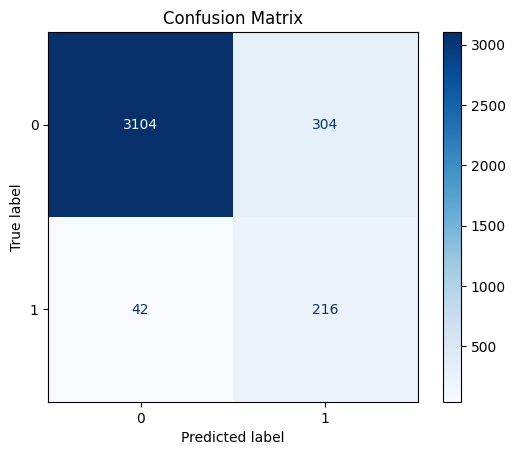

In [ ]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
# Define features and target
X = df.drop(columns='Q100')
y = df['Q100']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Apply RandomUnderSampler to undersample the majority class
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Apply SMOTE to oversample the minority class
smote_een = SMOTEENN(sampling_strategy=1,random_state=42)
X_train_resampled, y_train_resampled = smote_een.fit_resample(X_train, y_train)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=500,       # Number of trees
    max_depth=100,         # Maximum depth of each tree (None = no limit)
    min_samples_split=2,    # Minimum number of samples required to split a node
    min_samples_leaf=1,     # Minimum number of samples required at a leaf node
    max_features='sqrt',    # Number of features to consider at each split
    random_state=42,
    class_weight='balanced'  # Balanced class weights
)
rf_model.fit(X_train_resampled, y_train_resampled)

y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Show feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("Top 10 Features by Importance:\n", feature_importances.head(10))

# Show confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()



# 2. Logistic regression

Model Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94      3408
           1       0.41      0.93      0.57       258

    accuracy                           0.90      3666
   macro avg       0.70      0.92      0.76      3666
weighted avg       0.95      0.90      0.92      3666

Confusion Matrix:
 [[3057  351]
 [  17  241]]


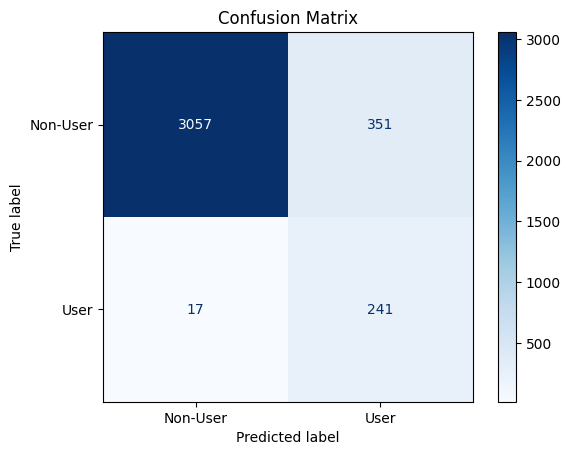

Feature Coefficients:
    Feature  Coefficient
64    Q145     0.267401
0       Q1     0.246233
9      Q48     0.223376
38    Q112     0.218353
67    Q148     0.212120
..     ...          ...
42    Q116    -0.266774
72    Q126    -0.357142
6      Q32    -0.375682
24     Q83    -0.404481
7      Q33    -0.685885

[75 rows x 2 columns]


In [ ]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(columns='Q100') 
y = df['Q100']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["Non-User", "User"], cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


# Feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': df.drop(columns='Q100').columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print("Feature Coefficients:\n", coefficients)


# 3. Gradient Boost with under&over sampler


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

X_selected = df[selected_columns]
y = df['Q100']  # Target variable

# Stratified train-test split to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Apply RandomUnderSampler to reduce majority class (class 0)
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Step 3: Apply SMOTETomek to oversample and clean the training set
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_resampled, y_train_resampled)

# Step 4: Train a Gradient Boosting model using the selected features
gbc_model = GradientBoostingClassifier(
    n_estimators=500,  # Number of boosting stages to be run
    max_depth=6,       # Maximum depth of the individual estimators
    learning_rate=0.1, # Step size shrinkage used to prevent overfitting
    random_state=42    # For reproducibility
)
gbc_model.fit(X_train_resampled, y_train_resampled)

# Step 5: Make predictions and evaluate the model on the test set
y_pred = gbc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Evaluate using cross-validation with Stratified K-Fold
skf = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(gbc_model, X_selected, y, cv=skf, scoring='f1_macro')
print(f"Cross-validated F1 scores: {cross_val_scores}")
print(f"Mean F1 score: {np.mean(cross_val_scores):.2f}")


Model Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.90      3408
           1       0.28      0.84      0.42       258

    accuracy                           0.84      3666
   macro avg       0.63      0.84      0.66      3666
weighted avg       0.94      0.84      0.87      3666

Cross-validated F1 scores: [0.51101707 0.50712936 0.55384312 0.54345685 0.51091477]
Mean F1 score: 0.53


In [35]:
subset_df = df.head(200)

# Save the subset to a new CSV file
subset_df.to_excel('subset_data.xlsx', index=False)

# 4.Decision Tree Model with over sampler

Decision Tree Model Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      3420
           1       0.44      0.62      0.52       246

    accuracy                           0.92      3666
   macro avg       0.71      0.78      0.74      3666
weighted avg       0.94      0.92      0.93      3666



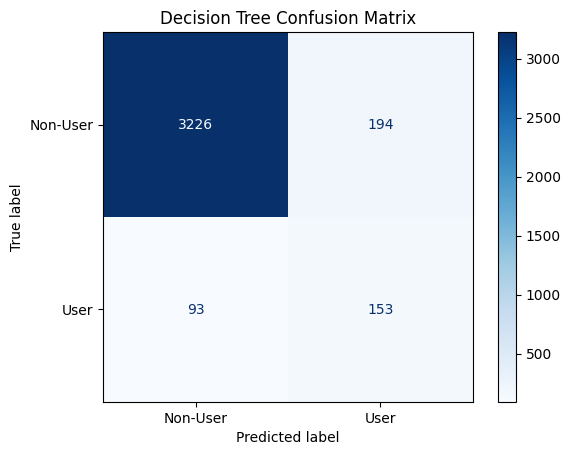

Top 10 Features by Importance:
    Feature  Importance
11     Q50    0.383004
3       Q6    0.109798
5      Q31    0.103267
4      Q30    0.041923
25     Q85    0.041364
72    Q126    0.029611
10     Q49    0.028673
47    Q121    0.016834
23     Q77    0.009024
19     Q67    0.007834


In [ ]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Define features and target
X = df.drop(columns='Q100')  # Features
y = df['Q100']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(
    max_depth=100,           # Maximum depth of the tree (None = no limit)
    min_samples_split=2,     # Minimum number of samples required to split a node
    min_samples_leaf=1,      # Minimum number of samples required at a leaf node
    max_features='sqrt',     # Number of features to consider at each split (optional, similar to RF)
    random_state=42,
    class_weight='balanced'  # Balanced class weights
)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the confusion matrix
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, display_labels=["Non-User", "User"], cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()


# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("Top 10 Features by Importance:\n", feature_importances.head(10))


# Visualizations

Visualization for Decision Tree

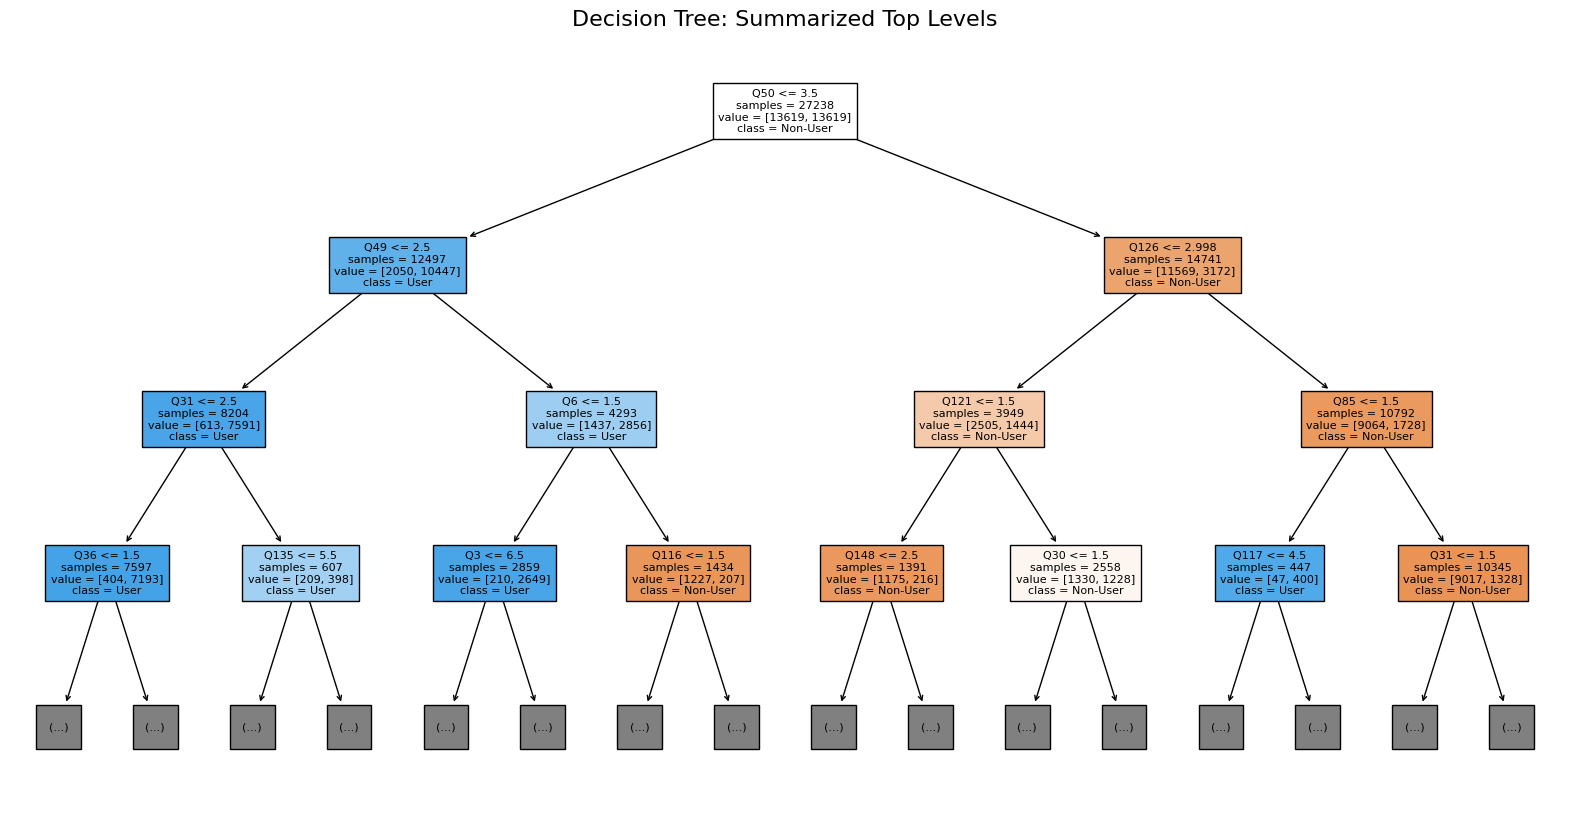

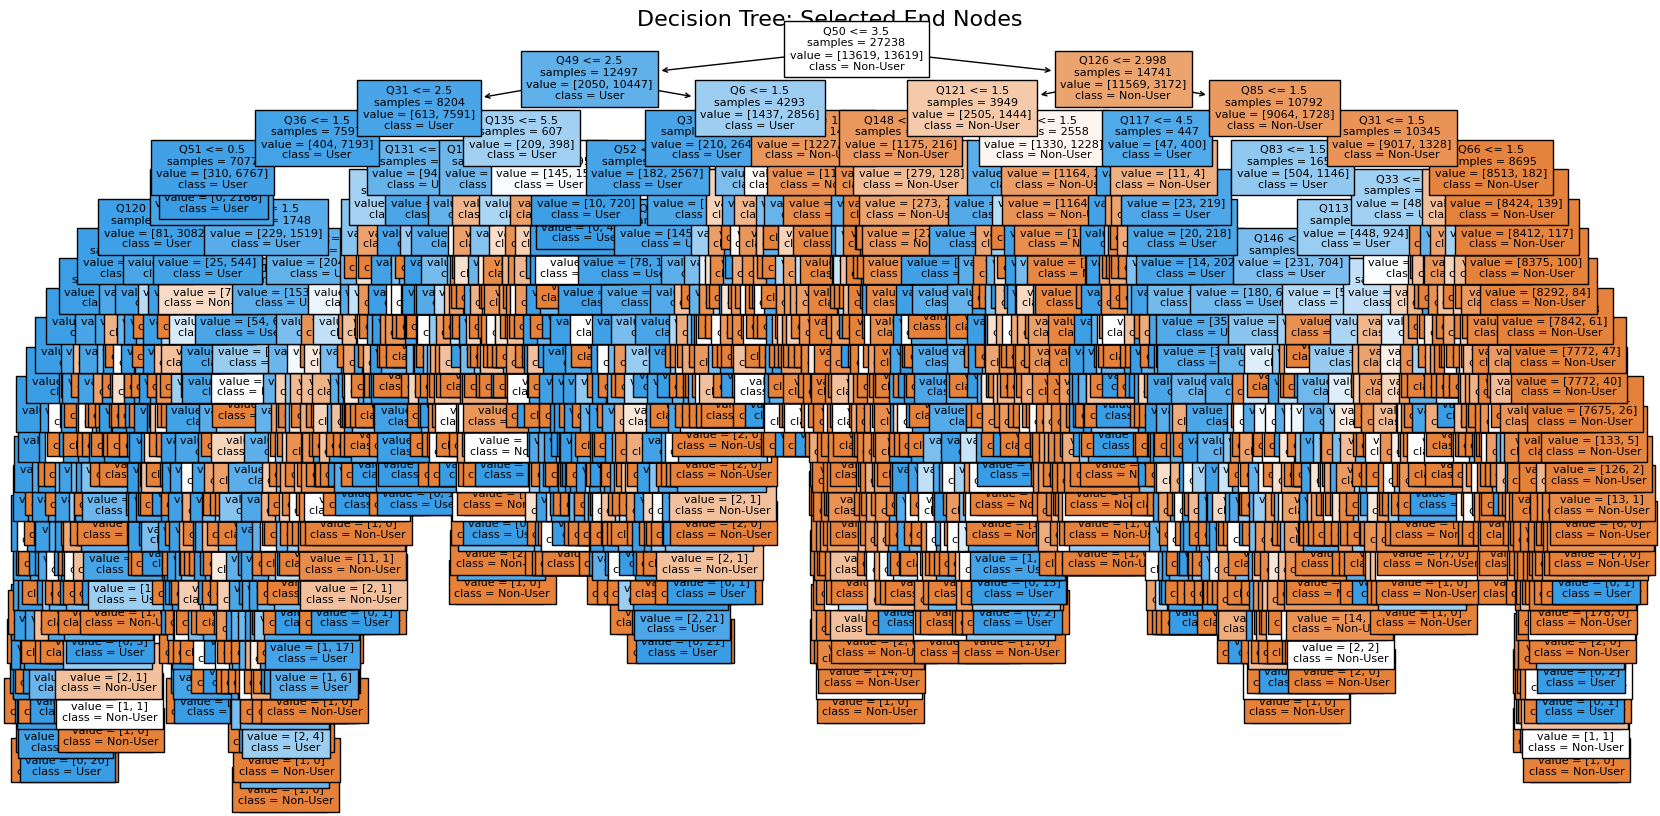

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot only the top few levels of the tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["Non-User", "User"],
    filled=True,
    fontsize=8,
    max_depth=3,  # Limit depth to show top levels
    impurity=False
)
plt.title("Decision Tree: Summarized Top Levels", fontsize=16)
plt.show()

# Plot only a focused view of a few end nodes
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["Non-User", "User"],
    filled=True,
    fontsize=8,
    max_depth=None,  # Show the full depth
    impurity=False
)
plt.title("Decision Tree: Selected End Nodes", fontsize=16)

# Adjust the view to focus on a specific range of nodes at the bottom
plt.xlim([10, 20])  # Adjust x-axis to show a range of nodes (fine-tune these values)
plt.ylim([0, 3])       # Adjust y-axis to limit the displayed depth
plt.show()


visualization for logistics regression

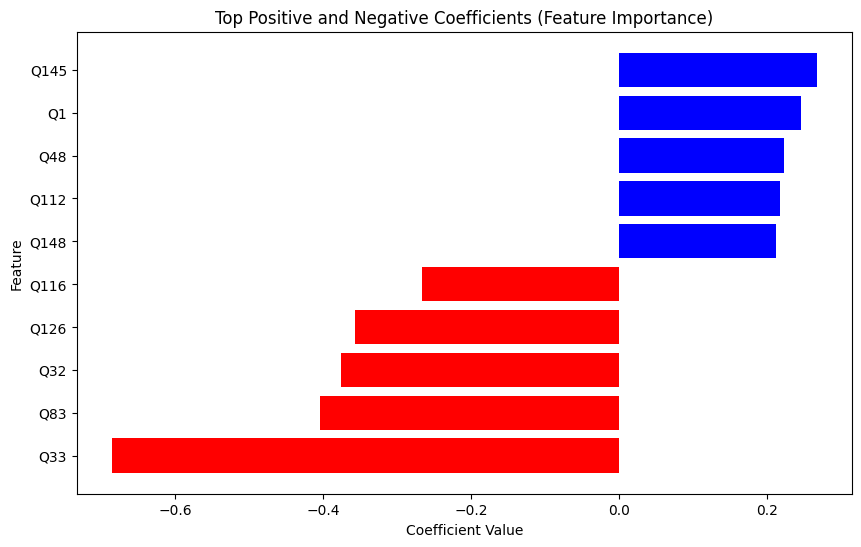

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for the coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Plot the top positive and negative coefficients
plt.figure(figsize=(10, 6))
top_coefficients = pd.concat([coefficients.head(5), coefficients.tail(5)])
plt.barh(top_coefficients['Feature'], top_coefficients['Coefficient'], color=(top_coefficients['Coefficient'] > 0).map({True: 'blue', False: 'red'}))
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top Positive and Negative Coefficients (Feature Importance)')
plt.gca().invert_yaxis()  # To display the highest at the top
plt.show()


Visualization for GradientBoost

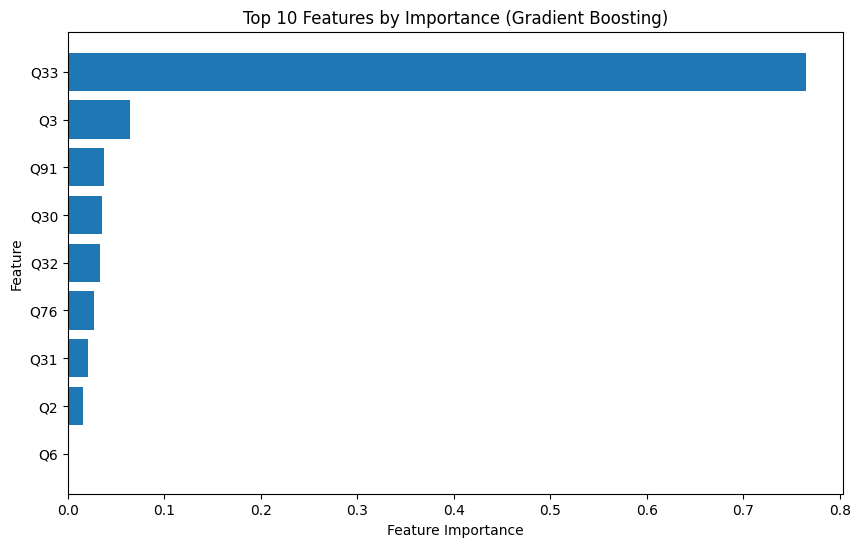

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': gbc_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 10 features by importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10], align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features by Importance (Gradient Boosting)')
plt.gca().invert_yaxis()
plt.show()


Now compare and analyze the models

                     Accuracy  F1-score (class 1)  Precision (class 1)  \
Random Forest            0.86                0.46                 0.31   
Logistic Regression      0.90                0.57                 0.41   
Gradient Boosting        0.84                0.42                 0.28   
Decision Tree            0.92                0.48                 0.42   

                     Recall (class 1)  
Random Forest                    0.85  
Logistic Regression              0.94  
Gradient Boosting                0.85  
Decision Tree                    0.54  


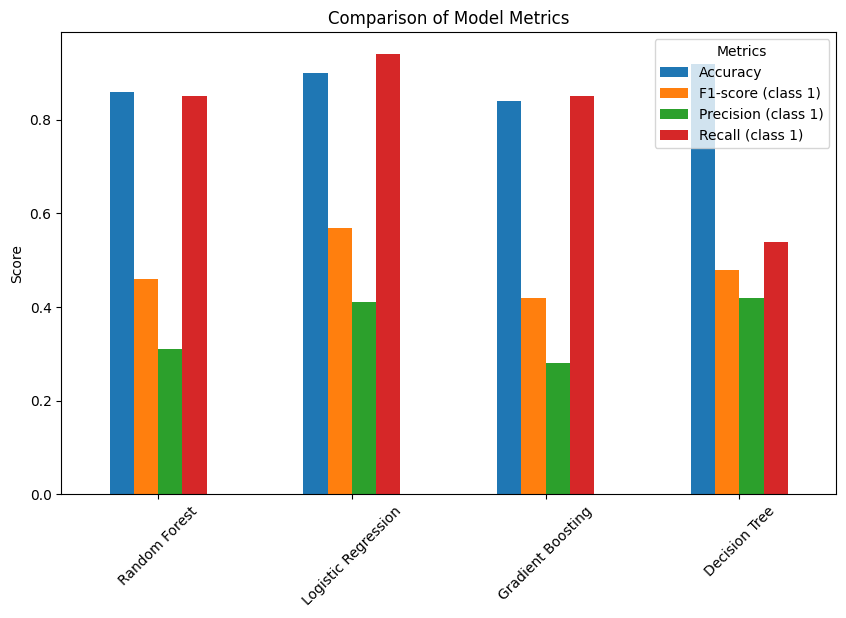

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary with classification report metrics for each model
models_metrics = {
    'Random Forest': {'Accuracy': 0.86, 'F1-score (class 1)': 0.46, 'Precision (class 1)': 0.31, 'Recall (class 1)': 0.85},
    'Logistic Regression': {'Accuracy': 0.90, 'F1-score (class 1)': 0.57, 'Precision (class 1)': 0.41, 'Recall (class 1)': 0.94},
    'Gradient Boosting': {'Accuracy': 0.84, 'F1-score (class 1)': 0.42, 'Precision (class 1)': 0.28, 'Recall (class 1)': 0.85},
    'Decision Tree': {'Accuracy': 0.92, 'F1-score (class 1)': 0.48, 'Precision (class 1)': 0.42, 'Recall (class 1)': 0.54},
}

# Convert the dictionary into a DataFrame for visualization
metrics_df = pd.DataFrame(models_metrics).T
print(metrics_df)

# Plot the metrics for comparison
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Model Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.show()


Radar Chart for evaluation

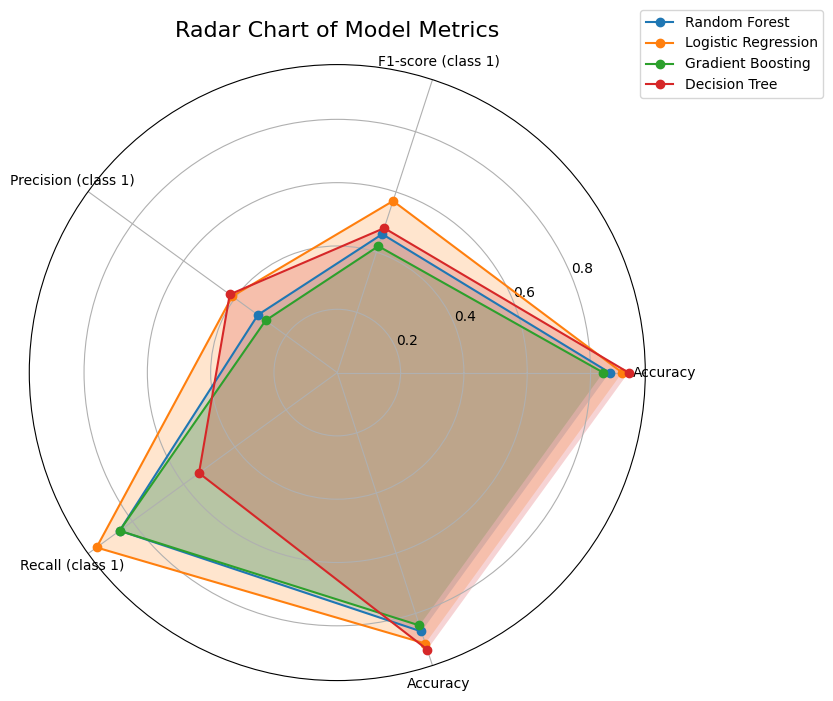

In [41]:
from math import pi
import matplotlib.pyplot as plt
import pandas as pd

# Convert metrics data into a radar chart format
metrics_df = pd.DataFrame(models_metrics).T
categories = list(metrics_df.columns)
num_models = len(models_metrics)

# Add the first column to close the radar plot
values = metrics_df.values.tolist()
for row in values:
    row.append(row[0])
categories.append(categories[0])

# Plot each model on the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})
for i, model_name in enumerate(models_metrics.keys()):
    ax.plot([2 * pi * j / len(categories) for j in range(len(categories))],
            values[i], label=model_name, marker='o')
    ax.fill([2 * pi * j / len(categories) for j in range(len(categories))],
            values[i], alpha=0.2)

ax.set_xticks([2 * pi * i / len(categories) for i in range(len(categories))])
ax.set_xticklabels(categories)
ax.set_title("Radar Chart of Model Metrics", size=16, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


Stacked Bar Chart for evaluation

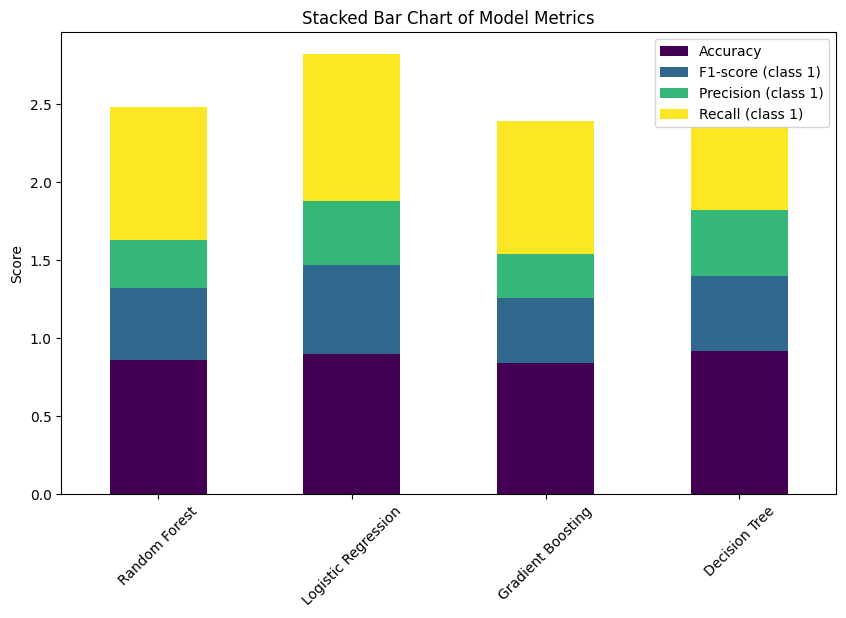

In [42]:
metrics_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Stacked Bar Chart of Model Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()
